<a href="https://www.kaggle.com/code/olimsuyunboyev/aviakompaniya-mijozlari-qoniqish?scriptVersionId=248319476" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
train = pd.read_csv("/kaggle/input/aviakompaniya/train_dataset.csv")
test = pd.read_csv("/kaggle/input/aviakompaniya/test_dataset.csv")
sample_submission = pd.read_csv("/kaggle/input/aviakompaniya/sample_submission.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [5]:
train.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [6]:
median = train['Arrival Delay in Minutes'].median()
median

0.0

In [7]:
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(median)

In [8]:
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(median)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [10]:
label = LabelEncoder()
train['Gender'] = label.fit_transform(train['Gender'].values)
train['Customer Type'] = label.fit_transform(train['Customer Type'].values)
train['Type of Travel'] = label.fit_transform(train['Type of Travel'].values)
train['Class'] = label.fit_transform(train['Class'].values)

In [11]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,1,33,0,1,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,0,0,49,0,0,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,0,0,43,0,1,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,0,0,27,0,0,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,1,0,11,1,1,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [12]:
train.corrwith(train['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Type of Travel                       0.482266
Class                                0.463430
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Customer Type                        0.181592
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048573
Departure Delay in Minutes           0.042960
Gate location                     

In [13]:
label = LabelEncoder()
test['Gender'] = label.fit_transform(test['Gender'].values)
test['Customer Type'] = label.fit_transform(test['Customer Type'].values)
test['Type of Travel'] = label.fit_transform(test['Type of Travel'].values)
test['Class'] = label.fit_transform(test['Class'].values)

In [14]:
x = train.drop('satisfaction', axis=1)
y = train['satisfaction']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# Model yaratamiz
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predict = log_model.predict(X_test)
log_acc = metrics.accuracy_score(y_test, y_predict)
log_acc
log_precision = precision_score(y_test, y_predict)
log_recall = recall_score(y_test, y_predict)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi", metrics.accuracy_score(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.77      0.68      0.73      1002
           1       0.72      0.80      0.76       998

    accuracy                           0.74      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.75      0.74      0.74      2000

Model aniqligi 0.742


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Model yaratamiz
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predict = svm_model.predict(X_test)
svm_acc = metrics.accuracy_score(y_test, y_predict)
svm_acc
svm_precision = precision_score(y_test, y_predict)
svm_recall = recall_score(y_test, y_predict)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi", metrics.accuracy_score(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.60      0.80      0.69      1002
           1       0.70      0.47      0.56       998

    accuracy                           0.63      2000
   macro avg       0.65      0.63      0.62      2000
weighted avg       0.65      0.63      0.62      2000

Model aniqligi 0.6345


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1002
           1       0.94      0.92      0.93       998

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi 0.929


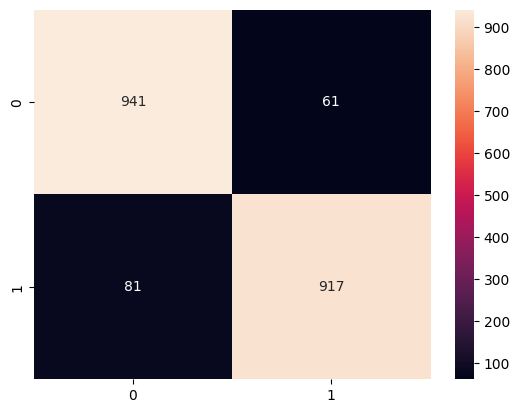

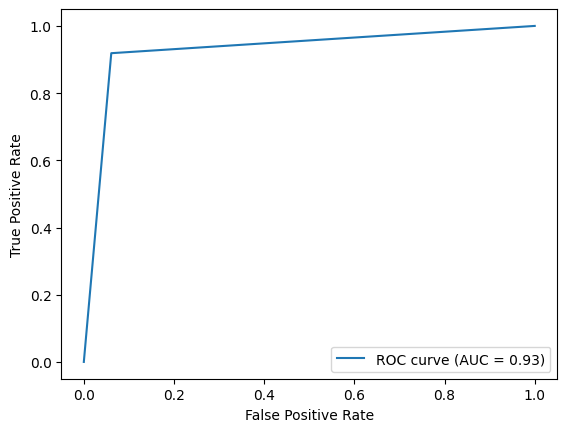

In [18]:
# Model yaratamiz
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predict = tree_model.predict(X_test)
tree_acc = metrics.accuracy_score(y_test, y_predict)
tree_acc
tree_precision = precision_score(y_test, y_predict)
tree_recall = recall_score(y_test, y_predict)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi", metrics.accuracy_score(y_test, y_predict))

conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
tree_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=tree_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1002
           1       0.96      0.93      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Model aniqligi 0.9475


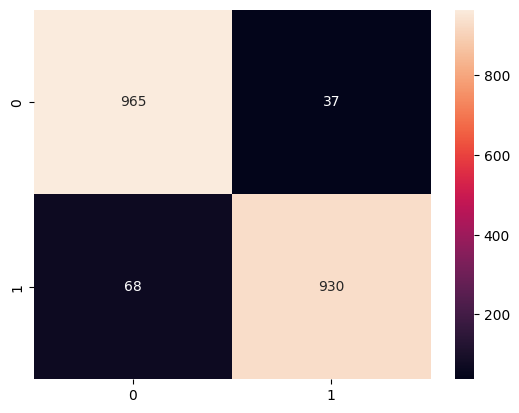

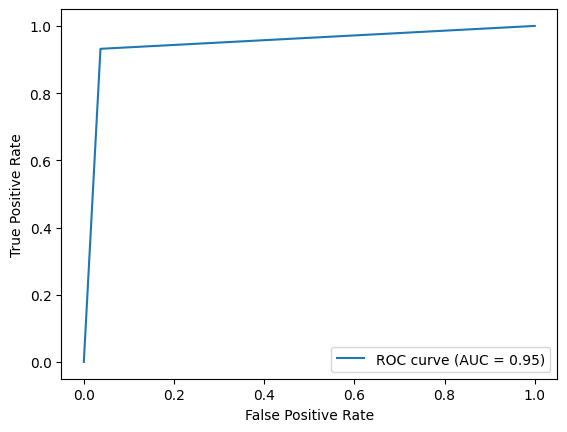

In [19]:
# Model yaratamiz
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predict = RF_model.predict(X_test)
rf_acc = metrics.accuracy_score(y_test, y_predict)
rf_acc
rf_precision = precision_score(y_test, y_predict)
rf_recall = recall_score(y_test, y_predict)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi", metrics.accuracy_score(y_test, y_predict))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
rf_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=rf_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.96      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Model aniqligi 0.9505


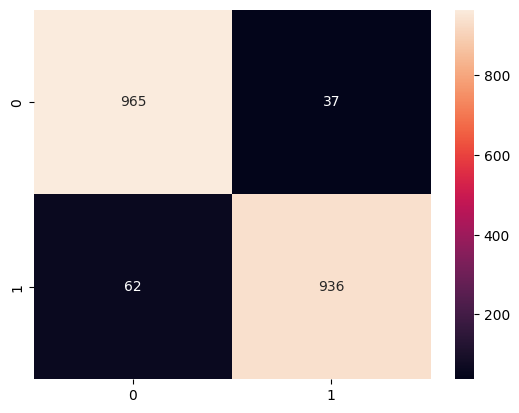

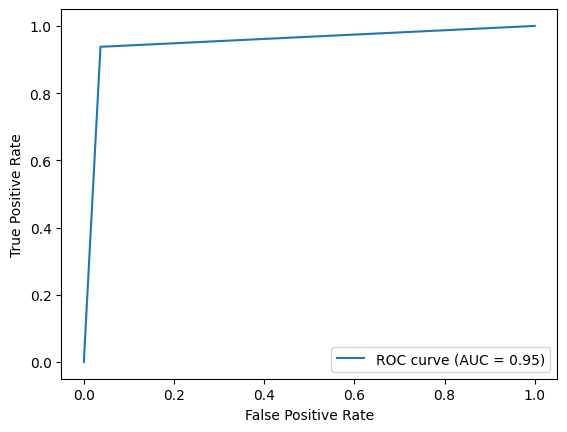

In [20]:
# Model yaratamiz
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predict = xgb_model.predict(X_test)
xgb_acc = metrics.accuracy_score(y_test, y_predict)
xgb_acc
xgb_precision = precision_score(y_test, y_predict)
xgb_recall = recall_score(y_test, y_predict)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi", metrics.accuracy_score(y_test, y_predict))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.show()

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
xgb_auc = metrics.auc(fpr, tpr)
display_roc = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=xgb_auc, estimator_name='ROC curve')
display_roc.plot()
plt.show()

In [21]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines',  
              'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy Score': [log_acc, svm_acc, tree_acc, rf_acc, xgb_acc],
    'Precision': [log_precision, svm_precision, tree_precision, rf_precision, xgb_precision],
    'Recall': [log_recall, svm_recall, tree_recall, rf_recall, xgb_recall]
})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score,Precision,Recall
4,XGBoost,0.9505,0.961973,0.937876
3,Random Forest,0.9475,0.961737,0.931864
2,Decision Tree,0.9290,0.937628,0.918838
0,Logistic Regression,0.7420,0.715950,0.800601
1,Support Vector Machines,0.6345,0.700752,0.466934


In [22]:
test_predictions = xgb_model.predict(test)

In [23]:
finalsolution = pd.DataFrame({'id': test['id'], 'satisfaction': test_predictions})


In [24]:
finalsolution.to_csv('PredictSatisfaction.csv', index=False)